![](https://www.timeshighereducation.com/sites/default/files/styles/the_breaking_news_image_style/public/Pictures/web/k/l/g/male-student-asleep-behind-books-and-beer-bottles.jpg?itok=HLjPhZAl)

# Table of Contents

[1. Introduction](#1)<br>
[2. Import Library](#2)<br>
[3. Exploratory Data Analysis (EDA)](#3)<br>
[4. Visualizations ](#4)<br>
[5. Hypothesis](#5)<br>

# Introduction<a id='1'></a>

# Import Library<a id='2'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
mat_class = pd.read_csv("../datasets/student-mat.csv")

# Exploratory Data Analysis (EDA)<a id='3'></a>

# Visualizations<a id='4'></a>

# Hypothesis<a id='5'></a>

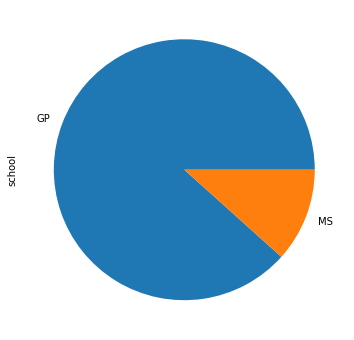

In [16]:
mat_class['school'].value_counts().plot.pie(figsize=(6, 6))

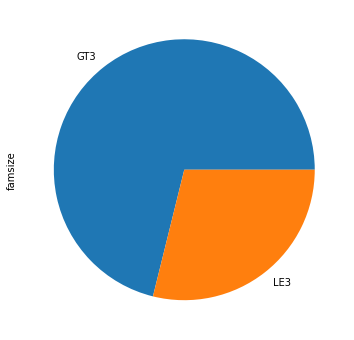

In [15]:
mat_class['famsize'].value_counts().plot.pie(figsize=(6, 6))

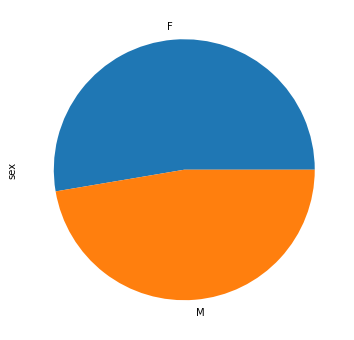

In [17]:
mat_class['sex'].value_counts().plot.pie(figsize=(6, 6))

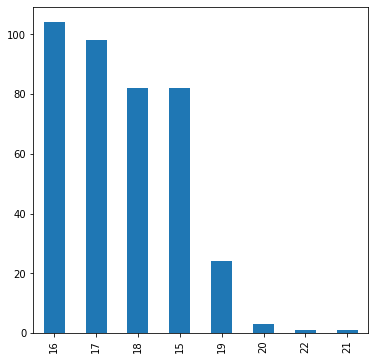

In [20]:
mat_class['age'].value_counts().plot.bar(figsize=(6, 6))

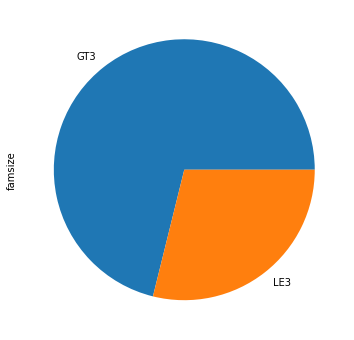

In [44]:
mat_class['famsize'].value_counts().plot.pie(figsize=(6, 6))

In [39]:
mat_class.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

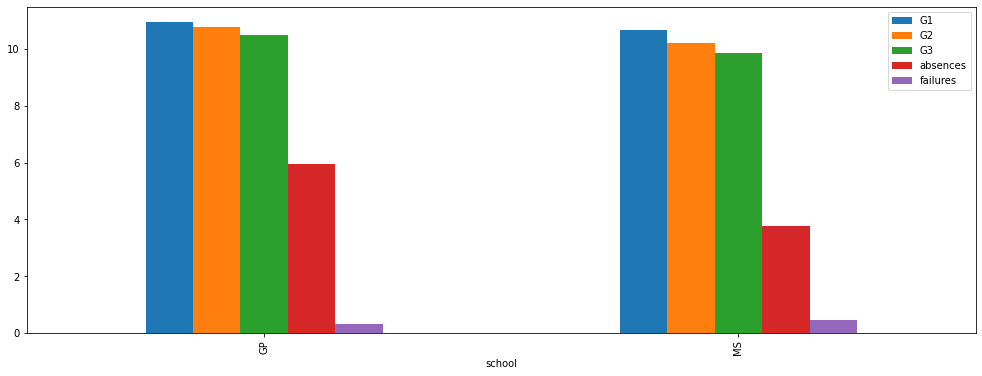

In [63]:
mat_class.groupby('school')[['G1','G2','G3','absences','failures']].mean().plot.bar(figsize=(17, 6))

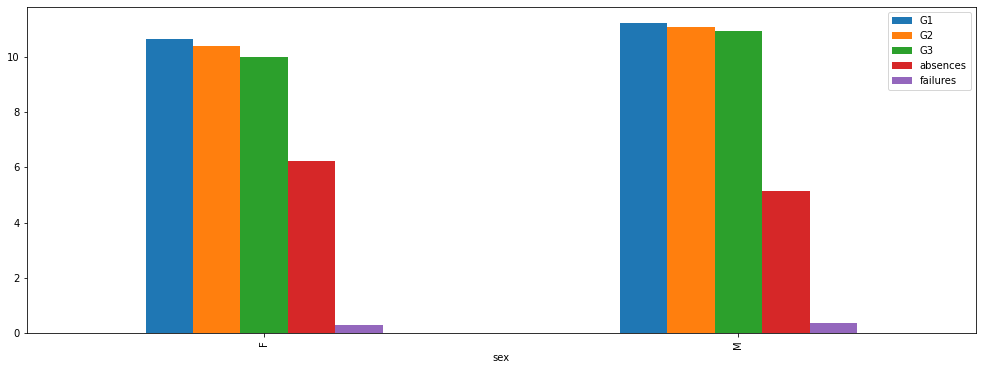

In [62]:
mat_class.groupby('sex')[['G1','G2','G3', 'absences','failures']].mean().plot.bar(figsize=(17, 6))

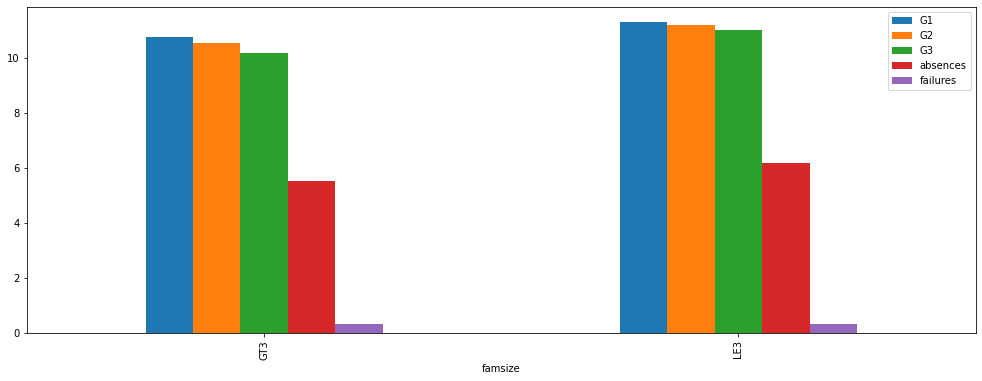

In [61]:
mat_class.groupby('famsize')[['G1','G2','G3', 'absences','failures']].mean().plot.bar(figsize=(17, 6))

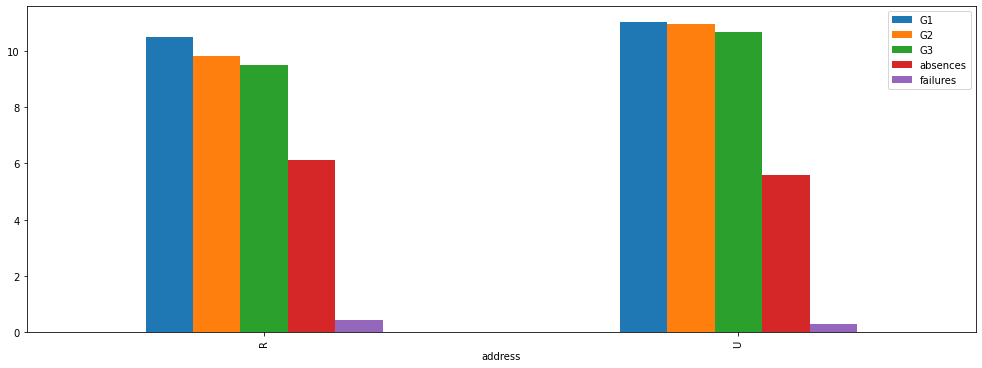

In [60]:
mat_class.groupby('address')[['G1','G2','G3', 'absences','failures']].mean().plot.bar(figsize=(17, 6))

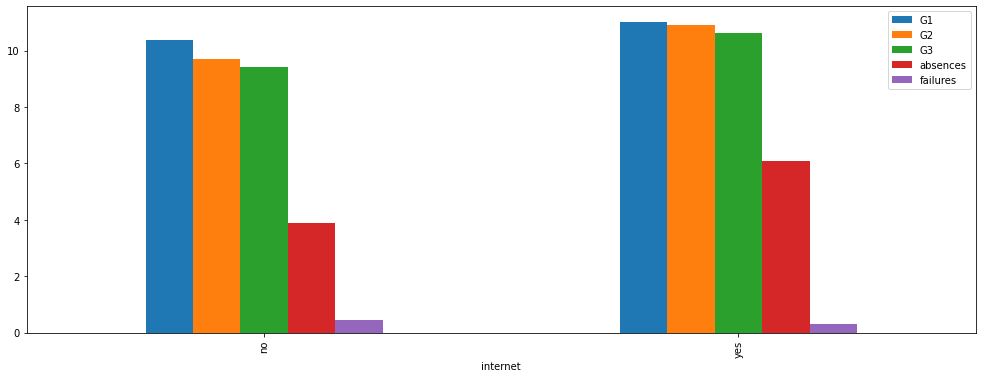

In [59]:
mat_class.groupby('internet')[['G1','G2','G3', 'absences','failures']].mean().plot.bar(figsize=(17, 6))

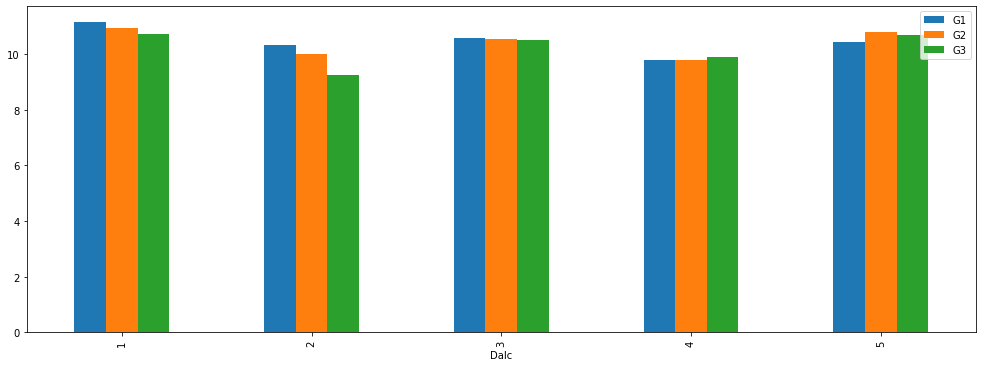

In [56]:
mat_class.groupby('Dalc')[['G1','G2','G3']].mean().plot.bar(figsize=(17, 6))

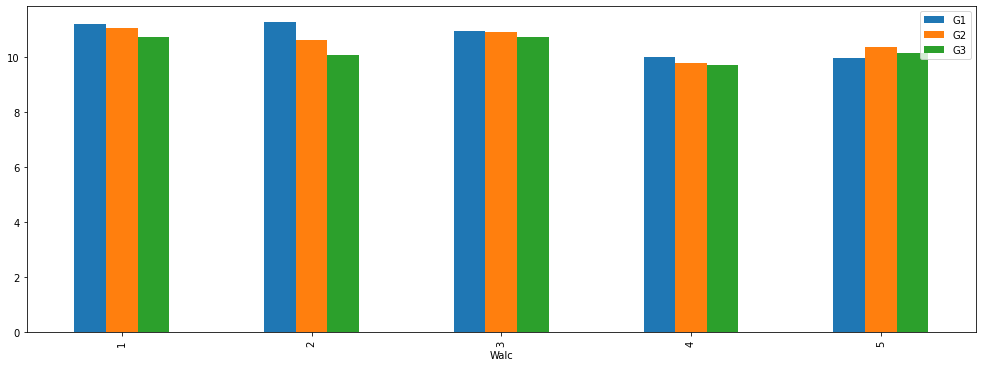

In [64]:
mat_class.groupby('Walc')[['G1','G2','G3']].mean().plot.bar(figsize=(17, 6))

### There are no empty columns

In [84]:
mat_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [ ]:
# %matplotlib notebook
# sns.pairplot(mat_class)
# plt.show()

In [85]:
s = ["school", "sex","address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian","schoolsup", "famsup","paid","activities","nursery", "higher","internet", "romantic"]

In [86]:
mat_class = pd.get_dummies(mat_class, columns=s, prefix=s)

In [87]:
mat_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  G1                 395 non-null    int64
 14  G2                 395 non-null    int64
 15  G3                 395 non-null    int64
 16  school_GP          395 non-null    uint8
 17  school_MS       

In [35]:
Y = mat_class[["health"]]

In [36]:
X = mat_class[["age", "Dalc", "Walc", "G1", "G2", "G3"]]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [38]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [39]:
reg.fit(X_train, y_train)

LinearRegression()

In [40]:
score = reg.score(X_test, y_test)

In [41]:
reg.intercept_

array([4.74280032])

In [42]:
reg.coef_

array([[-0.06750135,  0.14101357,  0.07310569,  0.02394209, -0.11362826,
         0.04521552]])

In [43]:
score

-0.09247164524163298

In [48]:
y_pred = reg.predict(X_test)

In [49]:
y_pred

array([[3.69857666],
       [3.37188539],
       [3.32815963],
       [3.76263479],
       [3.53558863],
       [3.45704511],
       [3.02616329],
       [3.36293301],
       [3.22695342],
       [3.45350411],
       [3.25613184],
       [3.38991178],
       [3.54966695],
       [3.38772098],
       [3.36810383],
       [3.1876536 ],
       [3.3053251 ],
       [3.64780065],
       [3.87551816],
       [3.36361238],
       [3.86093499],
       [3.78698342],
       [3.53051881],
       [3.42462903],
       [3.92212034],
       [3.22515278],
       [3.25271829],
       [3.30438404],
       [3.911351  ],
       [3.34719841],
       [3.63225901],
       [3.67619835],
       [3.94234815],
       [3.77972281],
       [3.3399023 ],
       [3.24498919],
       [3.36452377],
       [3.25666636],
       [3.20551348],
       [3.51941469],
       [3.13892352],
       [3.26460635],
       [3.64195628],
       [3.30854247],
       [3.80281902],
       [3.4099058 ],
       [3.93681253],
       [3.188

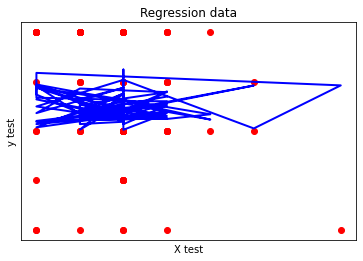

In [91]:
#Age is not a predictor of health score
plt.scatter(X_test["age"], y_test,  color='red')
plt.plot(X_test["age"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

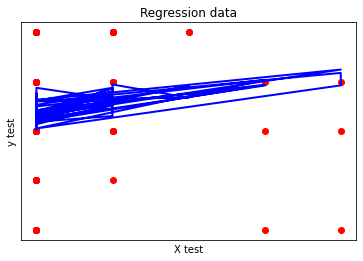

In [93]:
plt.scatter(X_test["Dalc"], y_test,  color='red')
plt.plot(X_test["Dalc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

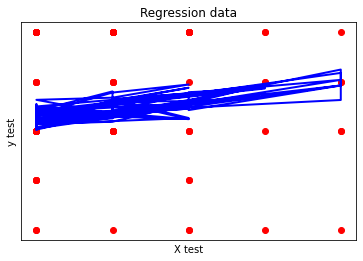

In [99]:
plt.scatter(X_test["Walc"], y_test,  color='red')
plt.plot(X_test["Walc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
plt.scatter(X_test["Walc"], y_test,  color='red')
plt.plot(X_test["Walc"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

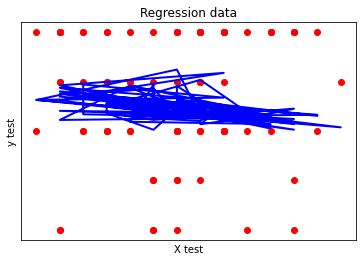

In [100]:
plt.scatter(X_test["G1"], y_test,  color='red')
plt.plot(X_test["G1"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

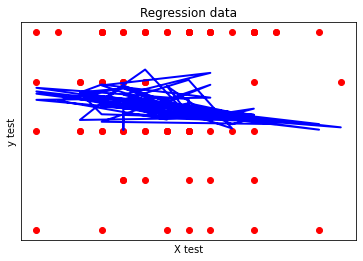

In [101]:
plt.scatter(X_test["G2"], y_test,  color='red')
plt.plot(X_test["G2"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

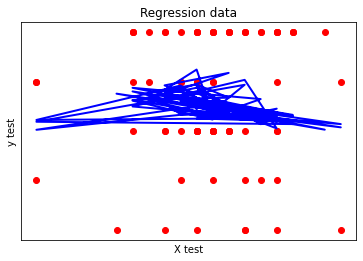

In [102]:
plt.scatter(X_test["G3"], y_test,  color='red')
plt.plot(X_test["G3"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

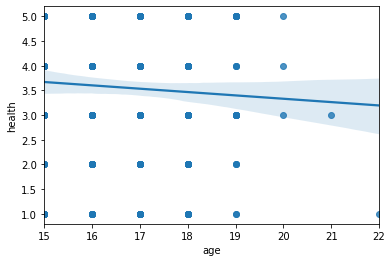

In [96]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='age', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["age"], reg.predict(x_line["age"]), 'r--')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

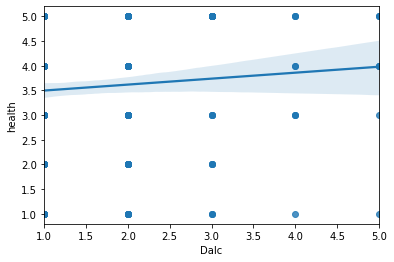

In [98]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='Dalc', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["Dalc"], reg.predict(x_line["Dalc"]), 'r--')
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

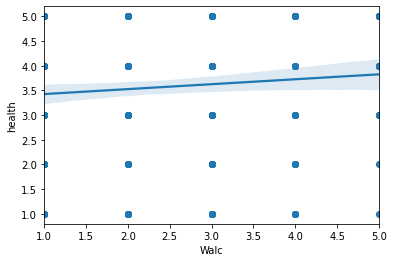

In [103]:
x_line = np.arange(5,9000).reshape(-1,1)
sns.regplot(x='Walc', y='health', data=mat_class, fit_reg=True)
plt.plot(x_line["Walc"], reg.predict(x_line["Walc"]), 'r--')
plt.show()

## Repeating Linear regression with more values

In [134]:
mat_class.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes'],
      dtype='object')

In [135]:
X2 = mat_class[['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T',
       'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other',
       'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home',
       'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'nursery_no', 'nursery_yes', 'higher_no',
       'higher_yes', 'internet_no', 'internet_yes', 'romantic_no',
       'romantic_yes']]

In [160]:
mat_corr = mat_class.corr()["G3"].sort_values(ascending=False)

In [161]:
por_corr = por_class.corr()["G3"].sort_values(ascending=False)

In [168]:
new_df = pd.DataFrame()

In [169]:
new_df["mat_corr"] = mat_class.corr()["G3"].sort_values(ascending=False)

In [171]:
new_df["por_corr"] = por_class.corr()["G3"].sort_values(ascending=False)

In [172]:
new_df

,mat_corr,por_corr
G3,1.000000,1.000000
G2,0.904868,0.918548
G1,0.801468,0.826387
Medu,0.217147,0.240151
higher_yes,0.182465,0.332172
Fedu,0.152457,0.211800
romantic_no,0.129970,0.090583
Mjob_health,0.116158,0.101244
address_U,0.105756,0.167637
sex_M,0.103456,-0.129077


In [136]:
X2

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
2,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
3,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
4,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0
391,0,1,0,1,0,1,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0
392,0,1,0,1,1,0,1,0,0,1,...,1,0,1,0,0,1,1,0,1,0
393,0,1,0,1,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,1,0


In [174]:
Y = mat_class[["G3"]]

In [175]:
X = mat_class[["Medu", "higher_yes","Fedu","failures", "goout", "age"]]

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [177]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [178]:
reg.fit(X_train, y_train)

LinearRegression()

In [179]:
score = reg.score(X_test, y_test)

In [184]:
score

0.20723408740291493

In [181]:
y_pred = reg.predict(X_test)

In [144]:
y_pred

array([[3.5625 ],
       [4.90625],
       [3.375  ],
       [3.6875 ],
       [3.65625],
       [2.875  ],
       [4.     ],
       [4.125  ],
       [3.09375],
       [2.75   ],
       [3.375  ],
       [4.09375],
       [4.34375],
       [3.9375 ],
       [3.75   ],
       [2.75   ],
       [3.75   ],
       [2.78125],
       [3.28125],
       [3.6875 ],
       [2.625  ],
       [4.625  ],
       [4.96875],
       [3.25   ],
       [3.875  ],
       [3.6875 ],
       [4.53125],
       [3.1875 ],
       [2.75   ],
       [2.78125],
       [4.09375],
       [3.1875 ],
       [2.84375],
       [3.375  ],
       [4.125  ],
       [5.     ],
       [2.9375 ],
       [3.4375 ],
       [3.6875 ],
       [3.9375 ],
       [4.     ],
       [2.90625],
       [3.8125 ],
       [4.125  ],
       [3.78125],
       [3.1875 ],
       [3.4375 ],
       [3.90625],
       [4.125  ],
       [3.71875],
       [2.625  ],
       [2.625  ],
       [4.5    ],
       [4.03125],
       [4.3125 ],
       [4.

In [182]:
reg.intercept_

array([10.17354169])

In [183]:
reg.coef_

array([[ 0.55635912,  1.98347422, -0.23165995, -1.69647441, -0.45380215,
        -0.04338336]])

In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
                            mean_absolute_percentage_error
y_pred = reg.predict(X_test)
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

MSE: 17.008201351241677
MAE: 3.2391058986977366
MAPE: 3156593479415038.0


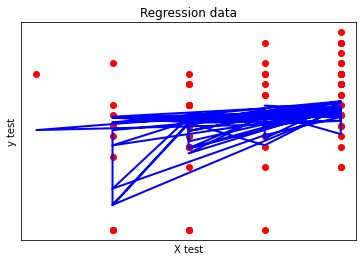

In [188]:
plt.scatter(X_test["Medu"], y_test,  color='red')
plt.plot(X_test["Medu"], y_pred, color='blue', linewidth=2)
plt.xlabel("X test")
plt.ylabel("y test")
plt.title("Regression data")
plt.xticks(())
plt.yticks(())

plt.show()

In [7]:
por_class = pd.read_csv("../datasets/student-por.csv")

In [88]:
por_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [157]:
por_class = pd.get_dummies(por_class, columns=s, prefix=s)